In [1]:
import numpy as np
import math
from enum import Enum
from collections import namedtuple
# matplotlib
# ライブラリーのインポート
import matplotlib.pyplot as plt
# インライン表示
%matplotlib inline
# 日本語フォント
import pylab
from matplotlib.font_manager import FontProperties
# 日本語フォント
fp = FontProperties(fname='C:\WINDOWS\Fonts\msgothic.ttc', size = 12)

# 第四章　暖冷房設備

# 第二節　ダクト式セントラル空調機

### 5.　最大暖房出力

日付$d$の時刻$t$における1時間当たりの最大暖房出力$Q_{max,H,d,t}$は、式(1)により表される。

$$ 
\begin{equation*}
    Q_{max,H,d,t} = q_{rtd,H} \times C_{df,d,t} \times 3600 \times 10^{-6}
\end{equation*}
$$


<div style="text-align: right;"> (1) </div>

ここで、  

$Q_{max,H,d,t}$：日付$d$の時刻$t$における1時間当たりの最大暖房出力(MJ/h)  
$q_{rtd,H}$：定格暖房能力(W)  
$C_{df,d,t}$：日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数(-)  

である。

定格暖房能力$q_{rtd,H}$は、付録Aにより定まる。

In [2]:
def Q_max_H(q_rtd_H, C_df):
    '''最大暖房出力(MJ/h)を計算する'''
    # q_rtd_H: 定格暖房能力(W)
    # C_df: デフロストに関する暖房出力補正係数(-)

    return q_rtd_H * C_df * 3600 * 10**(-6)

日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数$C_{df,d,t}$は、外気温度$\theta_{ex,d,t}$が5℃未満かつ外気相対湿度$h_{ex,d,t}$が80%以上の場合にデフロストが発生すると仮定して、式(2)により定まる。

<p style="text-indent:2em">外気温度$\theta_{ex,d,t}$が5℃未満かつ外気相対湿度$h_{ex,d,t}$が80%以上の場合：</p>  
$$ 
\begin{equation*}
   C_{df,d,t} = 0.77
\end{equation*}
$$


<div style="text-align: right;"> (2-1) </div>

<p style="text-indent:2em">外気温度$\theta_{ex,d,t}$が5℃以上かつ外気相対湿度$h_{ex,d,t}$が80%未満の場合：</p>  
$$ 
\begin{equation*}
   C_{df,d,t} = 1.0
\end{equation*}
$$


<div style="text-align: right;"> (2-2) </div>

ここで、  

$C_{df,d,t}$：日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数(-)  
$h_{ex,d,t}$：日付$d$の時刻$t$における外気相対湿度(%)  
$\theta_{ex,d,t}$：日付$d$の時刻$t$における外気温度(℃)  

である。

In [3]:
def get_C_df(theta_ex, RH_ex):
    '''デフロストに関する暖房出力補正係数(-)を取得する'''
    # theta_ex: 外気温度(℃)
    # RH_ex: 外気相対湿度(%)
    
    if theta_ex < 5 and 80<= RH_ex:
        return  0.77
    else:
        return  1.0

Example

In [4]:
np.vectorize(get_C_df)([[4],[5],[6]],[79,80,81])

array([[ 1.  ,  0.77,  0.77],
       [ 1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  ,  1.  ]])

In [5]:
Q_max_H(1000, get_C_df(20, 70))

3.5999999999999996

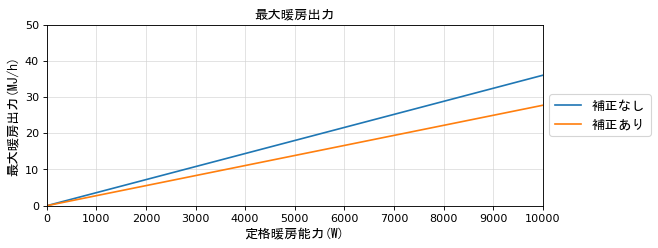

In [6]:
# 出力結果
plt.figure(figsize = (8, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('最大暖房出力', fontdict={'fontproperties':fp})

for i,category in enumerate(['補正なし','補正あり']):
    x_values =[x for x in range(0, 10000)]
    y_values = {'補正なし' :[Q_max_H(x, get_C_df(20, 70)) for x in x_values],
                '補正あり' :[Q_max_H(x, get_C_df( 0, 90)) for x in x_values]}[category]
    plt.plot(x_values, y_values, label=category)
        
ax=plt.gca()
ax.set_xlabel('定格暖房能力(W)', fontdict={'fontproperties':fp})
ax.set_xticks([x for x in range(0, 11000, 1000)], minor=False)
ax.set_xbound(lower=0, upper=10000)

ax.set_ylabel('最大暖房出力(MJ/h)', fontdict={'fontproperties':fp})
ax.set_yticks([y for y in range(0, 60, 10)], minor=False)
ax.set_ybound(lower=0, upper=50)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)

plt.show()

### 6.　暖房エネルギー消費量

#### 6.1　消費電力量

日付$d$の時刻$t$における1時間当たりの消費電力量$E_{E,H,d,t}$は、式(3)により表される。

$$ 
\begin{equation*}
    E_{E,H,d,t} = \left( E_{E,comp,H,d,t} + E_{E,aux,H,d,t} \right) \times C_{DL}
\end{equation*}
$$


<div style="text-align: right;"> (3) </div>

ここで、  

$C_{DL}$：断熱区画外ダクト熱損失による消費電力量補正係数(-)  
$E_{E,aux,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの補機の消費電力量(kWh/h)  
$E_{E,comp,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの圧縮機の消費電力量(kWh/h)  
$E_{E,H,d,t}$：日付$d$の時刻$t$における1時間当たりの暖房の消費電力量(kWh/h)  

である。

断熱区画外ダクト熱損失による消費電力量補正係数$C_{DL}$は、付録Cにより定まる。

In [7]:
def E_E_H(E_E_comp_H, E_E_aux_H, C_DL):
    '''暖房の消費電力量(kWh/h)を計算する'''
    # E_E_comp_H：圧縮機の消費電力量(kWh/h)  
    # E_E_aux_H：補機の消費電力量(kWh/h)
    # C_DL：断熱区画外ダクト熱損失による消費電力量補正係数(-)  
    
    return (E_E_comp_H + E_E_aux_H) * C_DL

#### 6.2　ガス消費量

#### 6.3　石油消費量

#### 6.4　その他の燃料による一次エネルギー消費量

### 7.　最大冷房出力

### 8.　冷房エネルギー消費量

### 9.　圧縮機

#### 9.1　消費電力量

##### 9.1.1　暖房

日付$d$の時刻$t$における1時間当たりの圧縮機の消費電力量$E_{E,comp,H,d,t}$は、式(@)により表される。

$$ 
\begin{equation*}
    E_{E,comp,H,d,t} = \frac{{Q'_{T,H,d,t}}} {e_{th,H,d,t}\times r_{comp,H,d,t}}
\end{equation*}
$$


<div style="text-align: right;"> (@) </div>

ここで、  

$E_{E,comp,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの圧縮機の消費電力量(kWh/h)  
$e_{th,H,d,t}$：日付$d$の時刻$t$におけるヒートポンプサイクルの理論暖房効率(-)  
$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  
$r_{comp,H,d,t}$：日付$d$の時刻$t$におけるヒートポンプサイクルの理論暖房効率に対する圧縮機の暖房効率の比(-)  

である。

In [8]:
def E_E_comp_H(Q_dash_T_H, e_th_H, r_comp_H):
    '''暖房時の圧縮機の消費電力量(kWh/h)を計算する'''
    # Q_dash_T_H：補正処理暖房負荷(MJ/h)  
    # e_th_H：ヒートポンプサイクルの理論暖房効率(-)  
    # r_comp_Hz：ヒートポンプサイクルの理論暖房効率に対する圧縮機の暖房効率の比(-)  
    
    return Q_dash_T_H / (e_th_H * r_comp_H)

日付$d$の時刻$t$における1時間当たりの補正暖房処理負荷$Q'_{T,H,d,t}$は、式(@)により表される。

$$ 
\begin{equation*}
    Q'_{T,H,d,t} = \frac{Q_{T,H,d,t}} {C_{df,d,t}}
\end{equation*}
$$


<div style="text-align: right;"> (@) </div>

ここで、  

$C_{df,d,t}$：日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数(-)  
$Q_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの処理暖房負荷(MJ/h)  
$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  

である。

In [9]:
def Q_dash_T_H(Q_T_H, C_df):
    '''補正処理暖房負荷(MJ/h)を計算する'''
    # Q_T_H：処理暖房負荷(MJ/h)  
    # C_df: デフロストに関する暖房出力補正係数(-)
    
    return Q_T_H / C_df

Example

In [10]:
E_E_comp_H(Q_dash_T_H(1000, get_C_df(20, 70)), 3, 1.0)

333.3333333333333

##### 9.1.1　冷房

#### 9.2　ヒートポンプサイクルの理論効率に対する圧縮機効率の比

##### 9.2.1　暖房

日付$d$の時刻$t$におけるヒートポンプサイクルの理論暖房効率に対する圧縮機の暖房効率の比$r_{comp,H,d,t}$は、式(@)により表される。

<p style="text-indent:2em">$Q'_{T,H,d,t} \bigg/ \left( 3600 \times 10^{-6} \right) \leq q_{min, H}$の場合：</p> 
$$ 
\begin{equation*}
    r_{comp,H,d,t} = r_{comp,min,H} - \left\{ q_{min,H} - Q'_{T,H,d,t} \bigg/ \left( 3600 \times 10^{-6} \right) \right\} \times \frac{r_{comp,min,H}}{q_{min,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@-1) </div>

<p style="text-indent:2em">$q_{min, H} < Q'_{T,H,d,t} \bigg/ \left( 3600 \times 10^{-6} \right) \leq q_{mid, H} $の場合：</p> 
$$ 
\begin{equation*}
    r_{comp,H,d,t} = r_{comp,mid,H} - \left\{ q_{mid,H} - Q'_{T,H,d,t} \bigg/ \left( 3600 \times 10^{-6} \right) \right\} \times \frac{r_{comp,mid,H} - r_{comp,min,H}}{q_{mid,H} - q_{min,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@-2) </div>

<p style="text-indent:2em">$q_{mid, H} < Q'_{T,H,d,t} \bigg/ \left( 3600 \times 10^{-6} \right) \leq q_{rtd, H} $の場合：</p> 
$$ 
\begin{equation*}
    r_{comp,H,d,t} = r_{comp,rtd,H} - \left\{ q_{rtd,H} - Q'_{T,H,d,t} \bigg/ \left( 3600 \times 10^{-6} \right) \right\} \times \frac{r_{comp,rtd,H} - r_{comp,mid,H}}{q_{rtd,H} - q_{mid,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@-3) </div>

<p style="text-indent:2em">$q_{rtd, H} < Q'_{T,H,d,t} \bigg/ \left( 3600 \times 10^{-6} \right)$の場合：</p> 
$$ 
\begin{equation*}
    r_{comp,H,d,t} = r_{comp,rtd,H} - \left\{ q_{rtd,H} - Q'_{T,H,d,t} \bigg/ \left( 3600 \times 10^{-6} \right) \right\} \times \frac{r_{comp,rtd,H}}{q_{rtd,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@-4) </div>

消費電力および暖房能力が既知の動作点が最小・中間・定格の3点の場合、$q_{min,H}$、$q_{mid,H}$、$q_{rtd,H}$はJIS＊＊＊＊が定める性能試験により得られる値とする。

消費電力および暖房能力が既知の動作点が中間・定格の2点の場合、$q_{mid,H}$、$q_{rtd,H}$はJIS＊＊＊＊が定める性能試験により得られる値とし、$q_{min,H}$は式(@)により計算される値とする。

$$ 
\begin{equation*}
    q_{min,H} = q_{rtd,H} \times 0.35
\end{equation*}
$$

<div style="text-align: right;"> (@) </div>

消費電力および暖房能力が既知の動作点が定格の1点の場合、$q_{rtd,H}$はJIS＊＊＊＊が定める性能試験により得られる値とし、$q_{min,H}$、$q_{mid,H}$は式(@)により計算される値とする。

$$ 
\begin{equation*}
    q_{min,H} = q_{rtd,H} \times 0.35
\end{equation*}
$$

<div style="text-align: right;"> (@-1) </div>

$$ 
\begin{equation*}
    q_{mid,H} = q_{rtd,H} \times 0.50
\end{equation*}
$$

<div style="text-align: right;"> (@-2) </div>

##### 9.2.2　冷房

### 10.　補機

#### 10.1　消費電力量

#### 10.2　空気送風ファンの風量

### 11.　室内機

#### 11.1　熱交換器表面温度

#### 11.2　吹出し空気温度